# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

### Import functions ###
from utils.Auxiliary import *


# Input


In [2]:
### Combinations ###
DataTypeVec = ["BostonHousingBinned"]
ModelTypeVec = ["TreeFarms"]
RelativeVec = ["Passive", None]
Combinations = list(itertools.product(DataTypeVec, ModelTypeVec, RelativeVec))


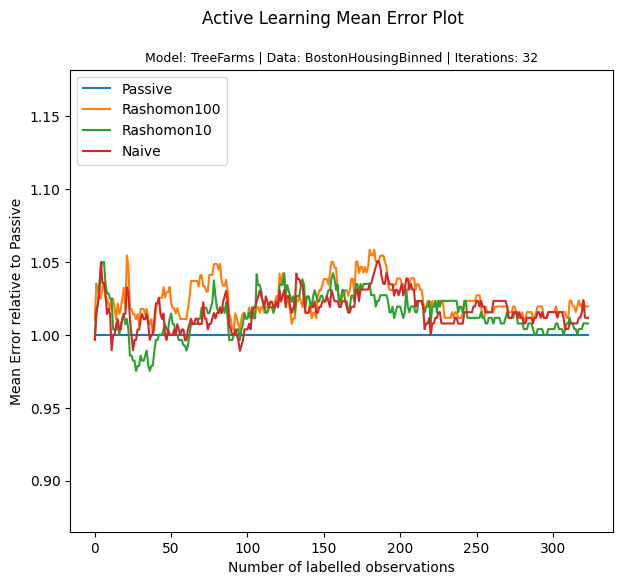

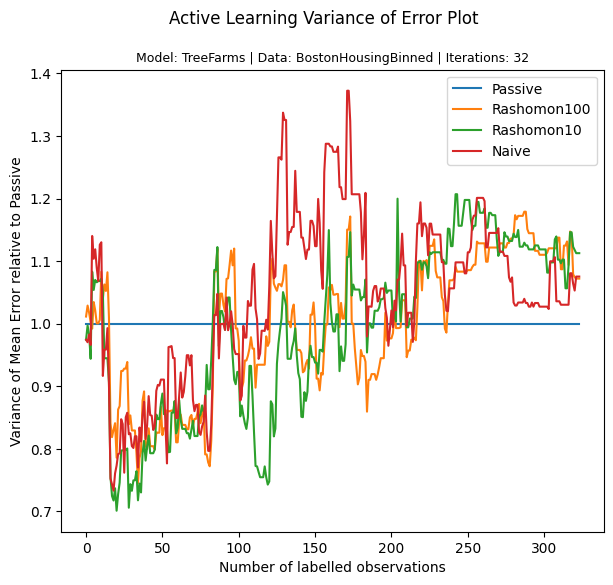

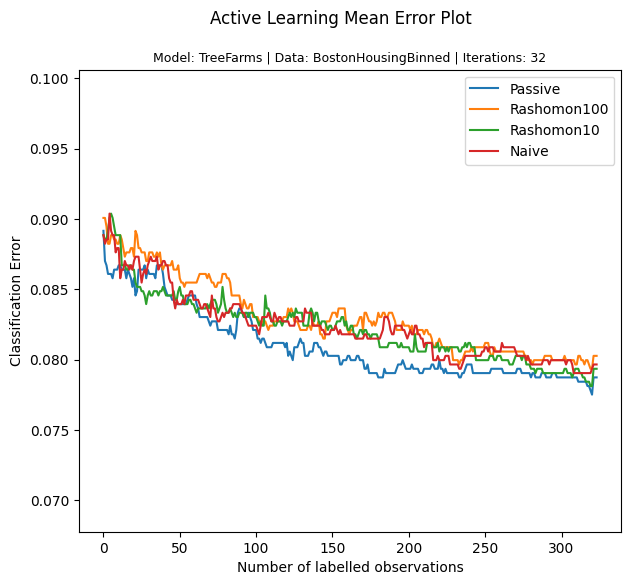

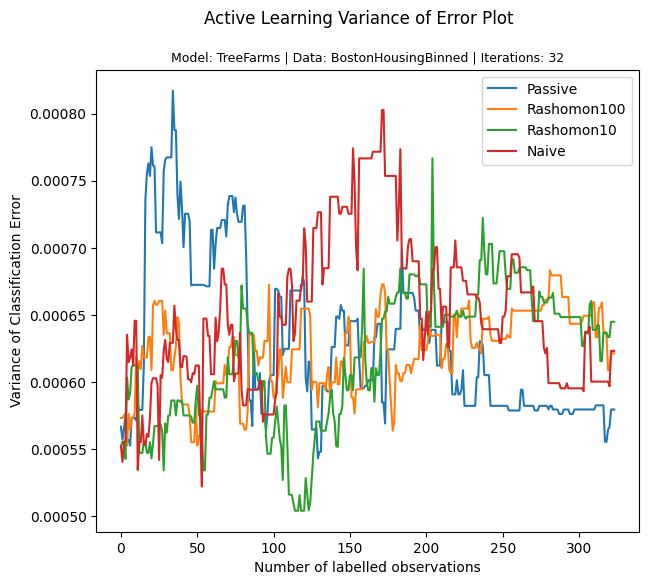

In [3]:
### Set Up ###
WRSTResultsDict = {}

### Get Results ###
for i in range(0, len(Combinations)):

    ### Set Up ###
    DataType = Combinations[i][0]
    ModelType = Combinations[i][1]
    RelativeType = Combinations[i][2]
    PlotArgs = {"TransparencyVal" : 0.00, "CriticalValue" : 1.96, "RelativeError" : RelativeType}
    
    ### Get Results ###
    WRSTResults, MeanPlot, VariancePlot =  MakePlotFunctions(DataType, ModelType, PlotArgs, SaveInput = "Dec2")
    
    ### Save WRST Results ###
    if DataType not in WRSTResultsDict:
        WRSTResultsDict[DataType] = {}
    WRSTResultsDict[DataType][ModelType] = WRSTResults

In [4]:
# PassiveRashomon = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/TreeFarms/ProcessedResults/Passive_ErrorMatrix.csv")
NaiveRashomon = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/TreeFarms/ProcessedResults/Naive_ErrorMatrix.csv", header = None)
RandomForestResults = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/RandomForestClassification/ProcessedResults/STTreeEnsembleQBC_MTRandomForestClassificationRashomonNum100_ErrorMatrix.csv", header = None)
Rashomon100Results = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousingBinned/TreeFarms/ProcessedResults/Rashomon100_ErrorMatrix.csv", header = None)

(<Figure size 700x600 with 1 Axes>, <Figure size 700x600 with 1 Axes>)

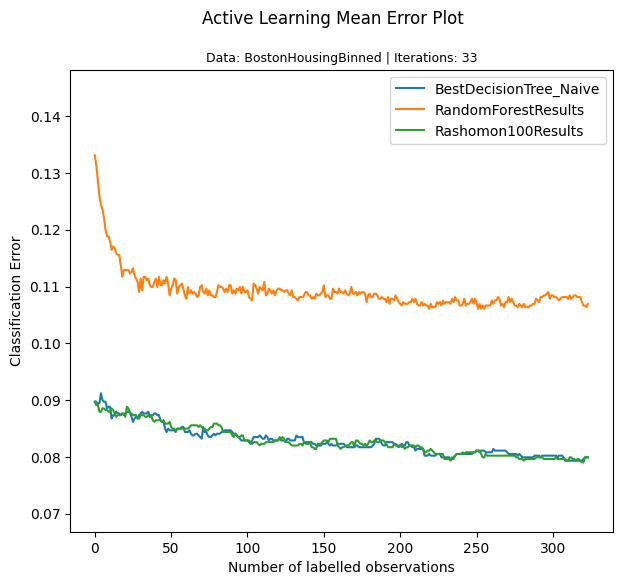

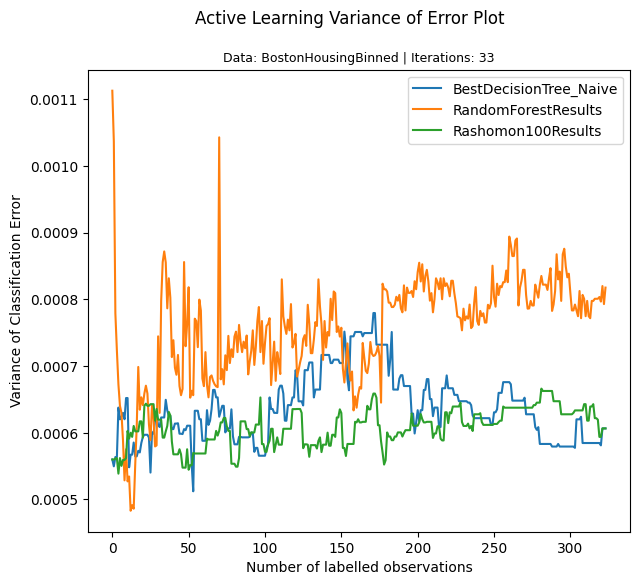

In [9]:
PlotSubtitle = (
        f"Data: {DataType} | Iterations: {Rashomon100Results.shape[0]}"
    )
MeanVariancePlot(Subtitle = PlotSubtitle,
                 TransparencyVal = 0,
                 CriticalValue = 1.96,
                 RelativeError = None,
                #  PassiveRashomon = PassiveRashomon,
                 BestDecisionTree_Naive = NaiveRashomon,
                 RandomForestResults = RandomForestResults, 
                 Rashomon100Results = Rashomon100Results)